In [55]:
# basics
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [56]:
#retriving dataset

data = fetch_california_housing(as_frame=True)
df = pd.concat([data.data, data.target.rename('MedHouseVal')], axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [57]:
#EDA for shape of dataset
print("Dataset shape: ",df.shape)
df.info

Dataset shape:  (20640, 9)


<bound method DataFrame.info of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]>

In [58]:
#EDA: statistics
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [59]:
#EDA: for finding null data
print("Count of null values per column. If zero, there are no null values.")
print(df.isnull().sum())

Count of null values per column. If zero, there are no null values.
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [60]:
# train/test - preventing overfitting
X = df.drop(columns='MedHouseVal')
y = df ['MedHouseVal' ]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

In [62]:
# model| training on linear regresion, to minimize the errors.
model = LinearRegression()
model.fit(X_train, y_train)

#for predictions
y_pred = model.predict(X_test)

In [63]:
# metrics| made changes in this code as previous version did not work.
'''
rmse = mean_squared_error(y_test, y_pred, squared=False)
'''

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae :.3f} RMSE:{rmse :.3f} R2:{r2 :.3f}")

MAE: 0.533 RMSE:0.746 R2:0.576


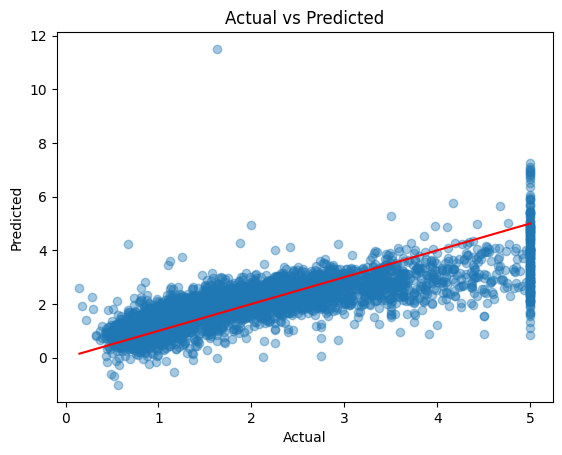

In [64]:
# plot
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

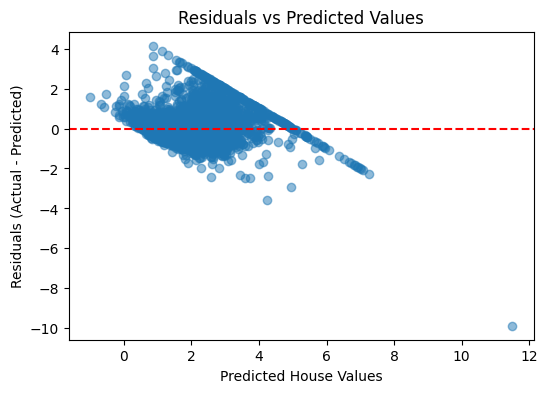

In [74]:
#Residuals graph:

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals vs predicted values
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, linestyle='--', color = 'red')
plt.xlabel("Predicted House Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted Values")
plt.show()

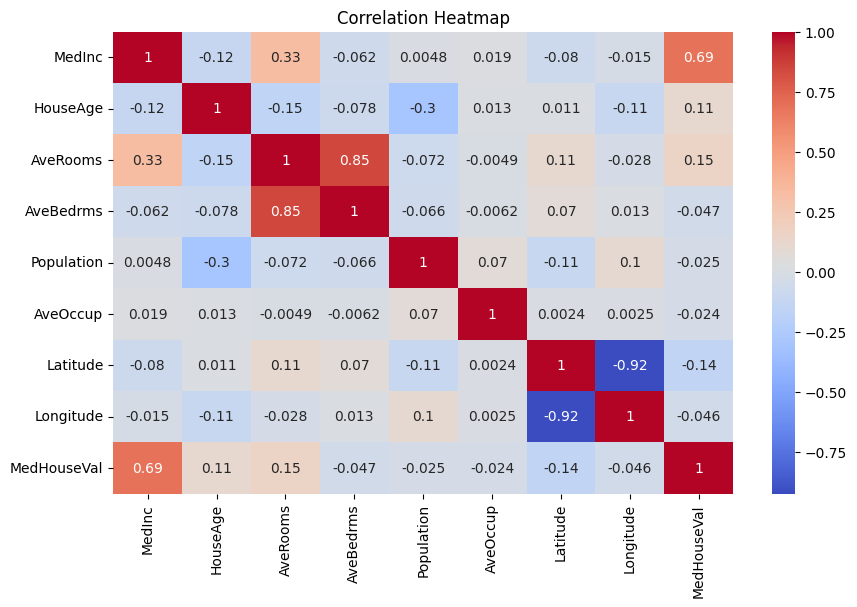

In [66]:
#EDA: Heat map

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

____
*UI Part for taking user input data using ipywidgets. (Optional Task.)*
____

In [67]:
!pip install ipywidgets


In [68]:
import ipywidgets as widgets
from IPython.display import display

In [69]:
#assigning input variables to fields

med_inc = widgets.FloatText(description="MedInc:")
house_age = widgets.FloatText(description="HouseAge:")
ave_rooms = widgets.FloatText(description="AveRooms:")
ave_bedrooms = widgets.FloatText(description="AveBedrms:")
population = widgets.FloatText(description="Population:")
ave_occup = widgets.FloatText(description="AveOccup:")
latitude = widgets.FloatText(description="Latitude:")
longitude = widgets.FloatText(description="Longitude:")

In [70]:
#for prediction logic on button click

def predict_price(button):
    with output:
        output.clear_output()

        input_data = [[
            med_inc.value,
            house_age.value,
            ave_rooms.value,
            ave_bedrooms.value,
            population.value,
            ave_occup.value,
            latitude.value,
            longitude.value
        ]]

        prediction = model.predict(input_data)
        print(f"Predicted House Price: {prediction[0]:.3f}")

In [71]:
predict_button = widgets.Button(description="Predict Price: ")
output = widgets.Output()

In [72]:
#DispLay

predict_button.on_click(predict_price)

display(
    med_inc,
    house_age,
    ave_rooms,
    ave_bedrooms,
    population,
    ave_occup,
    latitude,
    longitude,
    predict_button,
    output
  )

FloatText(value=0.0, description='MedInc:')

FloatText(value=0.0, description='HouseAge:')

FloatText(value=0.0, description='AveRooms:')

FloatText(value=0.0, description='AveBedrms:')

FloatText(value=0.0, description='Population:')

FloatText(value=0.0, description='AveOccup:')

FloatText(value=0.0, description='Latitude:')

FloatText(value=0.0, description='Longitude:')

Button(description='Predict Price: ', style=ButtonStyle())

Output()